In [120]:
import re
from functools import reduce
import pandas as pd

#global
INPUT_LOCATION = './inputs/day5.txt'
SEPARATOR = '\n'

In [121]:
clean_data = list(map(lambda x: x.rstrip() if len(x) > 1 else x,open(INPUT_LOCATION, 'r').readlines()))  

In [122]:
# for test
#clean_data = clean_data[0:10]

In [123]:
# floor operator
import math

class Parser():

    def __init__(self,input):
        self.seats = []
        for i in input:
            self.seats.append(self.parse(i))

    def __half(self,input): return input/2

    def __select(self,el):
       # print (el)
        if el == 'F': self.r = self.__take_lower(self.r)
        if el == 'B': self.r = self.__take_upper(self.r)
        if el == 'L': self.c = self.__take_lower(self.c)
        if el == 'R': self.c = self.__take_upper(self.c)
        
    
    def __take_upper(self,r):
        r['min'] = r['min'] + math.ceil((r['max'] - r['min']) / 2)
        #print('upper :: ',r)
        return r

    def __take_lower(self,r):
        r['max'] = r['min'] + math.floor((r['max'] - r['min'])/ 2)
        # print('lower :: ',r)
        return r
    
    def parse(self,input_str):


        # row position have 7 binay chars
        # from 0 to 2^7 possible numbers
        self.r = {'min': 0, 'max': (2**7) - 1}
        self.c = {'min': 0, 'max': (2**3) - 1}
        # print(input_str)
        # get a list of tokens to parse
        coord = []
        coord[:0] = input_str
        for i,el in enumerate(coord):
            self.__select(el)
    
        #print('parsing:' ,input_str , '\tid' , self.r['min']*8+self.c['min'],'\trow', self.r['min'],'\tcol',self.c['min'])
    
        return {
            'id': self.r['min']*8+self.c['min'], 
            'x': self.r['min'], 
            'y': self.c['min']  
            }
        
        


In [126]:
# for readable data on notebook
import pandas as pd

p = pd.DataFrame(Parser(clean_data).seats)
p.sort_values(by=['id'], ascending = False)


,id,x,y
157,963,120,3
378,962,120,2
831,961,120,1
572,960,120,0
779,959,119,7
...,...,...,...
47,31,3,7
457,30,3,6
566,29,3,5
63,28,3,4


<AxesSubplot:title={'center':'Airplane seats disposition'}, xlabel='x', ylabel='y'>

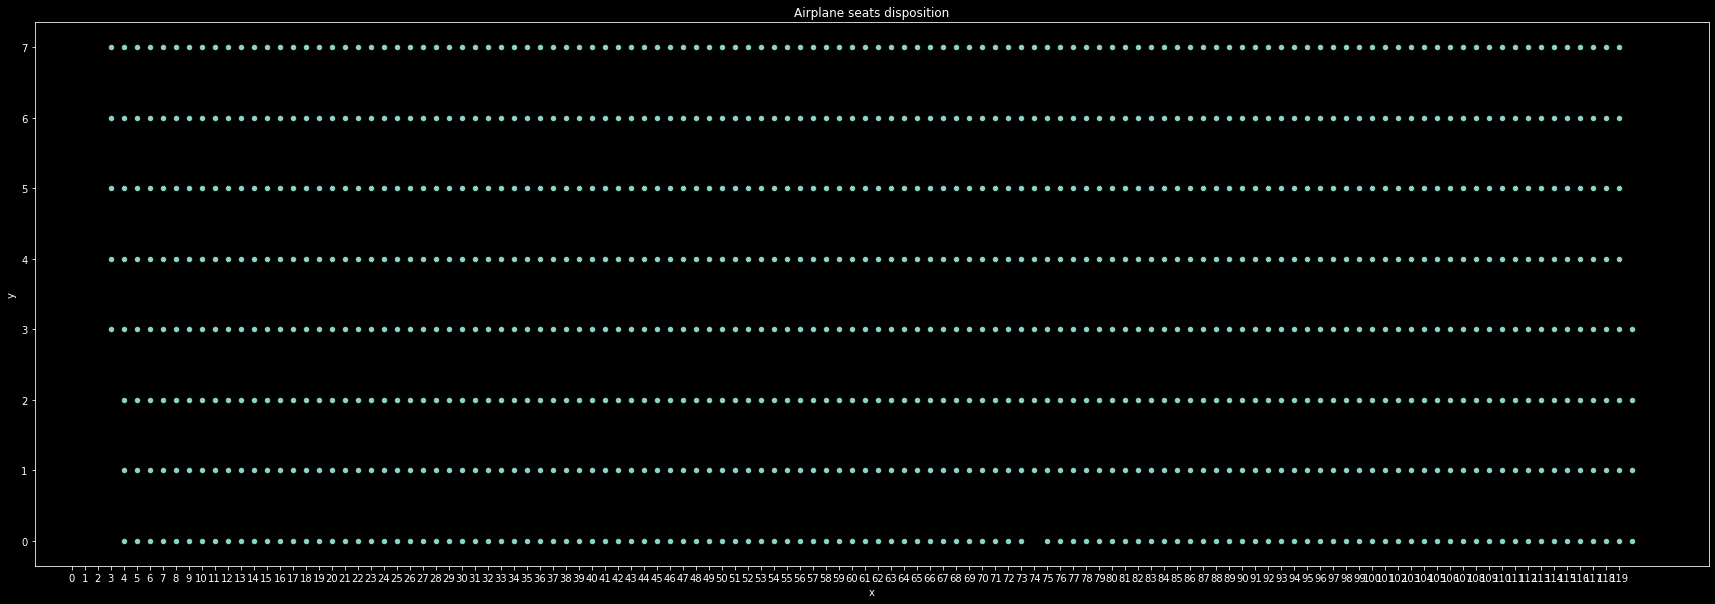

In [142]:
# from the graph i visually spot the missing seat in (74, 0) :D
# it may change on different input data! :P
p.plot.scatter(title='Airplane seats disposition', xlabel= 'seat row', ylabel= 'seat col', x='x',y='y', figsize=(30,10), xticks= range(0,120,1))

In [143]:
missing_seat_id = 74*8+0
missing_seat_id

592